# AI가 문맥을 파악하는 원리

AI는 어떻게 단어를 인식하고, 어떻게 단어 사이의 관계를 파악하며, 어떻게 이를 수정하는지에 대해서 학습 알고리즘 등의 내용은 모두 제외하고 개념만 쉽게 설명해 보겠습니다. 이를 위해서 컴퓨터는 다음의 세 가지가 가능해야 합니다.

1. 컴퓨터가 알아들어야 한다.
2. 단어 사이의 관계를 파악해야 한다.
3. 단어 사이의 관계를 수정해야 한다.

---

**첫째, 컴퓨터가 알아들어야 한다.**

이중 먼저 컴퓨터가 알아듣게 하는 과정을 **단어의 임베딩**이라고 합니다. 임베딩은 단어를 컴퓨터가 알아들을 수 있는 긴 숫자의 배열로 대체하는 것입니다(5교시, 6교시).
여기서는 임베딩을 아주 간단히 바꾸어 두 개의 숫자로 몇몇 단어를 임베딩해 보겠습니다.


In [1]:
import numpy as np

# 단어와 임베딩 벡터 정의
word_embeddings = {
    '귤': np.array([0, 6]),
    '딸기': np.array([0, 5]),
    '수박': np.array([1, 6]),
    '미소짓다': np.array([6, 1]),
    '화내다': np.array([6, 0]),
    '웃다': np.array([5, 0])
}

# 단어와 임베딩 벡터 출력
print("단어와 임베딩 벡터:")
for word, vec in word_embeddings.items():
    print(f"{word}: {vec}")

단어와 임베딩 벡터:
귤: [0 6]
딸기: [0 5]
수박: [1 6]
미소짓다: [6 1]
화내다: [6 0]
웃다: [5 0]


이것을 그래프로 표현해 보겠습니다.

/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46392 (\N{HANGUL SYLLABLE DDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo

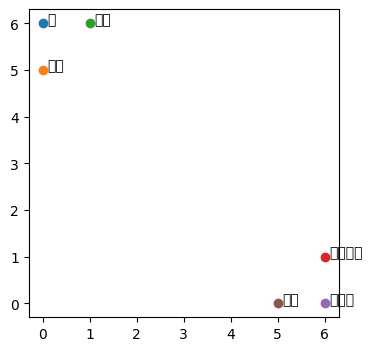

In [2]:
import matplotlib.pyplot as plt

# 단어 임베딩 시각화
plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word)
plt.show()

<p style="font-size:small;">
    (한글이 깨진다면 제일 하단의 코드를 먼저 실행시켜 주세요.)
</p>
<br>

---

**둘째, 단어 사이의 관계를 파악해야 한다.**

임베딩 된 두 단어 사이의 관계는 **내적**을 사용해 파악할 수 있습니다.
두 벡터 `(a1,a2)`, `(b1,b2)` 사이의 내적 구하기: `(a1 ⋅ b1) + (a2 ⋅ b2)`

In [3]:
def dot_product(vec1, vec2):
    return np.dot(vec1, vec2)

# 예제 단어들 사이의 내적 계산
print("귤 • 딸기:", dot_product(word_embeddings['귤'], word_embeddings['딸기']))
print("귤 • 수박:", dot_product(word_embeddings['귤'], word_embeddings['수박']))
print("수박 • 웃다:", dot_product(word_embeddings['수박'], word_embeddings['웃다']))
print("딸기• 화내다:", dot_product(word_embeddings['딸기'], word_embeddings['화내다']))


귤 • 딸기: 30
귤 • 수박: 36
수박 • 웃다: 5
딸기• 화내다: 0


---

**셋째, 단어 사이의 관계를 수정해야 한다.**

이때 처음 보는 단어 '사과'가 입력되었다고 합시다. 그런데 이 사과가 과일 사과인지, 무언가 잘못을 비는 행위의 사과를 의미하는지 아직 모릅니다.
이럴때 사용하는 방법은 일단 랜덤하게 위치를 시키고 적절히 수정하는 것입니다.
예를 들어 과일을 가리키는 단어 '귤'과 행위를 가리키는 단어 '어제일'을 예를 들어 가지고와서 각각 임베딩을 해보겠습니다.

/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.ve

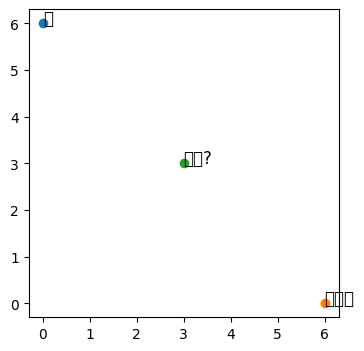

In [4]:
# 귤, 어제일의 벡터값 설정
귤 = np.array([0, 6])
어제일 = np.array([6, 0])

# 사과의 초기 벡터값 설정
사과 = np.array([3, 3])

# 초기 벡터 시각화
word_embeddings = {
    "귤": 귤,
    "어제일": 어제일,
    "사과?": 사과
}

plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0], vec[1], word, fontsize=12)
plt.show()


---
AI의 공부는 여기서 부터 시작입니다. 주어진 단어들, 입력된 자료들을 가지고 AI는 스스로 학습을 시작합니다. 이때 사용하는 알고리즘을 **딥러닝**이라고 합니다. <br>딥러닝을 이용해서 학습하면 주어진 사과가 과일인지 행위인지 파악하고 그 값을 적절히 위치시킬 수 있습니다. <br><br> 딥러닝의 실행을 위해 우리가 알아야 할 부분은 **신경망의 기초**(Part2: 1교시, 2교시), **실제 데이터를 사용한 모델링의 기초**(Part2: 3교시), **신경망의 활용**(Part2: 4교시, 5교시), 그리고 **어텐션과 트랜스포머**(Part2: 6교시)입니다. <br><br> 지금은 Part1, 개념을 파악하는 시간이므로, 학습된 결과를 숫자로 바꾸고, 학습을 진행하는 부분을 간단한 코드로 대체하겠습니다.

In [5]:
# 학습 이전의 단어들 사이의 내적 계산
print("귤 • 사과?:", dot_product(word_embeddings['귤'], word_embeddings['사과?']))
print("어제일 • 사과?:", dot_product(word_embeddings['어제일'], word_embeddings['사과?']))


# '사과' 벡터와 '귤'과의 관계를 학습한 결과
attention_result1 = 0.6
#--> 이 부분은 주어진 입력 데이터를 가지고 학습한 결과로 대체됩니다. 지금은 예시 값을 임시로 가지고 왔습니다.

# '사과' 벡터와 '어제일'과의 관계를 학습한 결과
attention_result2 = 0.45
#--> 이 부분 역시 주어진 입력 데이터를 가지고 학습한 결과로 대체됩니다. 지금은 예시 값을 임시로 가지고 왔습니다.

# 벡터 업데이트 함수
def update_vector(vec, target_vec, attention_result):
    new_vector = vec + attention_result * (target_vec - vec)
    return new_vector
 #--> 이 부분은 단어 사이의 문맥을 파악하고 단어 간의 관계를 수정해 주는 역할을 할 것이며,
 #--> 주로 어텐션, 트랜스포머를 활용하는 코드로 대체될 것입니다.

# '사과' 벡터와 '귤'사이의 거리 업데이트
사과_과일 = update_vector(사과, 귤, attention_result1)
print(f"업데이트된 사과 벡터 (사과_과일): {사과_과일}")

# '사과' 벡터와 '어제일'사이의 거리 업데이트
사과_행위 = update_vector(사과, 어제일, attention_result2)
print(f"업데이트된 사과 벡터 (사과_행위): {사과_행위}")


# 업데이트된 word_embeddings 설정
word_embeddings["사과_과일"] = 사과_과일
word_embeddings["사과_행위"] = 사과_행위

# 학습 이후의 단어들 사이의 내적 계산
print("귤 • 사과_과일:", dot_product(word_embeddings['귤'], word_embeddings['사과_과일']))
print("어제일 • 사과_행위:", dot_product(word_embeddings['어제일'], word_embeddings['사과_행위']))



귤 • 사과?: 18
어제일 • 사과?: 18
업데이트된 사과 벡터 (사과_과일): [1.2 4.8]
업데이트된 사과 벡터 (사과_행위): [4.35 1.65]
귤 • 사과_과일: 28.799999999999997
어제일 • 사과_행위: 26.099999999999998


위 내용을 그래프로 옮겨 보면 다음과 같습니다.

/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/deity719/para/area/everyone-ai-with-jo/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


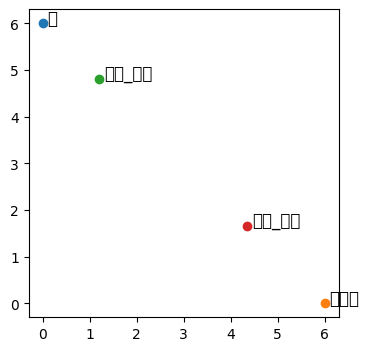

In [6]:

# 단어 임베딩 시각화
word_embeddings = {
    "귤": 귤,
    "어제일": 어제일,
    "사과_과일": 사과_과일,
    "사과_행위": 사과_행위
}

plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word, fontsize=12)

plt.show()


---

**Part2**에서 배울 내용:

1교시: 일단 도전하는 나의 첫 딥러닝
- <실습> 딥러닝의 기초

2교시: 딥러닝이 잘되는 이유를 이해하기
- <실습> 데이터 처리 기법

3교시: 이론이 실제 모델이 되기까지
- <실습> 실데이터로 도전하는 모델

4교시: 제대로 도전하는 딥러닝
- <실습> 컨볼루션 신경망 실행하기
- <실습> 전이학습 실행하기

5교시: 조금씩 맛보는 고급 딥러닝
- <실습> 설명 가능한 딥러닝 모델 만들기
- <실습> 생성형 이미지 딥러닝 실행

6교시: 챗GPT의 원리, 트랜스포머 이해하기
- <실습> 어텐션의 핵심 원리
- <실습> 트랜스포머의 기초


<br><br><br><br><br>

아래는 한글 폰트가 깨질때 실행해 주세요.

**<첫째>** 아래 코드를 실행합니다.

In [3]:
sudo apt-get install -y fonts-nanum


SyntaxError: invalid syntax (733936735.py, line 1)

In [ ]:
!fc-cache -fv
!rm -rf ~/.cache/matplotlib
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm -rf ~/.cache/matplotlib

**<둘째>** 위 메뉴에서 "**런타임 > 세션 다시 시작**"을 클릭해서 런타임을 재시작합니다.



**<셋째>** 아래 코드를 실행합니다.

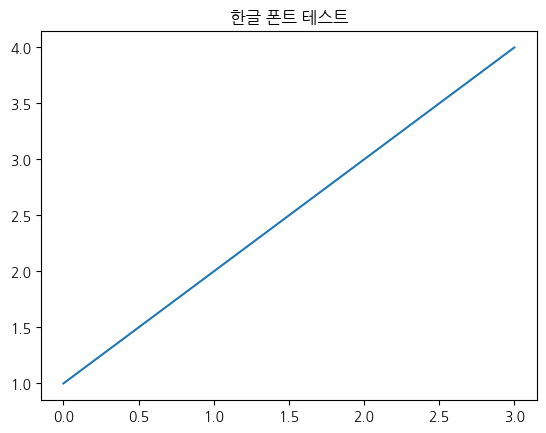

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot([1, 2, 3, 4])
plt.title('한글 폰트 테스트')
plt.show()